In [2]:
import jsonlines

import pandas as pd
import numpy as np

In [13]:
def readTwitterData(twitterDataFile):
    with jsonlines.open(twitterDataFile) as infile:
        reader = jsonlines.Reader(infile)
        for line in reader:
            if 'text' in line:
                yield line


In [16]:
tweet_data = readTwitterData('req_output.json')

In [17]:
tweets = pd.DataFrame(tweet_data)

In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 35 columns):
contributors                 0 non-null object
coordinates                  0 non-null object
created_at                   469 non-null object
display_text_range           115 non-null object
entities                     469 non-null object
extended_entities            96 non-null object
extended_tweet               13 non-null object
favorite_count               469 non-null int64
favorited                    469 non-null bool
filter_level                 469 non-null object
geo                          0 non-null object
id                           469 non-null int64
id_str                       469 non-null object
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        75 non-null float64
in_reply_to_status_id_str    75 non-null object
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null object
is_quote_status             

In [62]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mbusch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mbusch/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [118]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [55]:
text = tweets.text.tolist()

In [57]:
text[:10]

['RT @MoisesAlvaro_: #SeUnenONosHunden Tenemos que construir una coalición para ganarle a los corruptos, no sólo para que Claudia López esté…',
 'RT @matheuspiai: Melhor meio de transporte. Mais eficiente que os correios HAHAHAHA PABLO ❤❤ https://t.co/PnIwHZBNdR',
 'RT @shortdancevids: So smooth https://t.co/yEculjzEjB',
 '@gakumaru3 ああああああ！！すんごいありがとう！😭😭🙏💕💕💕イメージ通りに暴れておられて…🙏\nあと訳がほんとに…ありがとう😭🙏受験頑張るよう！💪✨',
 '#AllSports Tulsa vs Oklahoma State: As Told by a Tulsa Fan https://t.co/mavtRTLobL',
 'Brigitta Bulgari una bionda con un culo perfetto per essere sfondato  https://t.co/qPCCQlWYoL',
 'RT @gabriel_TheCode: Ok https://t.co/aYO954j92S',
 '#3: Dial Liquid Hand Soap, Cucumber &amp; Mint, 7.5 Fluid\xa0Ounces https://t.co/ssHvyzzyMQ',
 '@energizer_saudi @ABDULLAH_iS Done',
 'i wrote one of emilys essays for her summer work for her i love being a good ass friend']

In [65]:
from langdetect import detect

In [69]:
detect(text[0])

'es'

In [76]:
eng_text = []

for i,t in enumerate(text):
    try:
        if detect(t) == 'en':
            eng_text.append(t.lower())
    except:
        continue

In [77]:
eng_text[0:10]

['RT @shortdancevids: So smooth https://t.co/yEculjzEjB',
 '#AllSports Tulsa vs Oklahoma State: As Told by a Tulsa Fan https://t.co/mavtRTLobL',
 '#3: Dial Liquid Hand Soap, Cucumber &amp; Mint, 7.5 Fluid\xa0Ounces https://t.co/ssHvyzzyMQ',
 'i wrote one of emilys essays for her summer work for her i love being a good ass friend',
 'RT @wwichaeI: why did i make this https://t.co/S5p9Z39reF',
 'RT @PLinUSA: RT + follow and you could watch a #PL match in 🇬🇧\n#PLGoldenTicketSweepstakes \n\nNo pur nec Ends 9/18/17 21+ Rules:… ',
 'RT @kennagq: You just  lost 4-0 to Liverpool.\n\nYour failures are too many to choose from..\n\nIt is like a failure buffet https://t.co/N0gPoS…',
 '@SwanWithWalls [He moans softly and starts sliding his lips down her torso, pressing soft kisses to the flat skin of her belly.]',
 "RT @salemmitchell: this is SO sweet I'm crying https://t.co/oijPaXpKow",
 'Non https://t.co/wqOTj72vs8']

In [120]:
stopwords = stopwords + ['rt','https']

In [121]:
stopwords[-5:]

["won't", 'wouldn', "wouldn't", 'rt', 'https']

In [94]:
text_blob = " ".join(eng_text)

In [80]:
#text_blob

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
n_features = 10000 #default from sklearn demo... probably need to change

In [81]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features,
                                 min_df=2, stop_words=stopwords,
                                 use_idf=True)

In [82]:
# This creates a 'sparse matrix'
X = vectorizer.fit_transform(eng_text)

In [83]:
X

<195x165 sparse matrix of type '<class 'numpy.float64'>'
	with 454 stored elements in Compressed Sparse Row format>

In [84]:
X.shape

(195, 165)

In [85]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
cluster = AgglomerativeClustering(linkage='ward')

In [87]:
# AgglomerativeClustering needs a dense matrix, so we convert to numpy array
X_array = X.toarray()
cluster.fit(X_array)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [88]:
clusters = cluster.labels_.tolist()

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

%matplotlib inline

In [89]:
Z= linkage(X_array, 'ward')

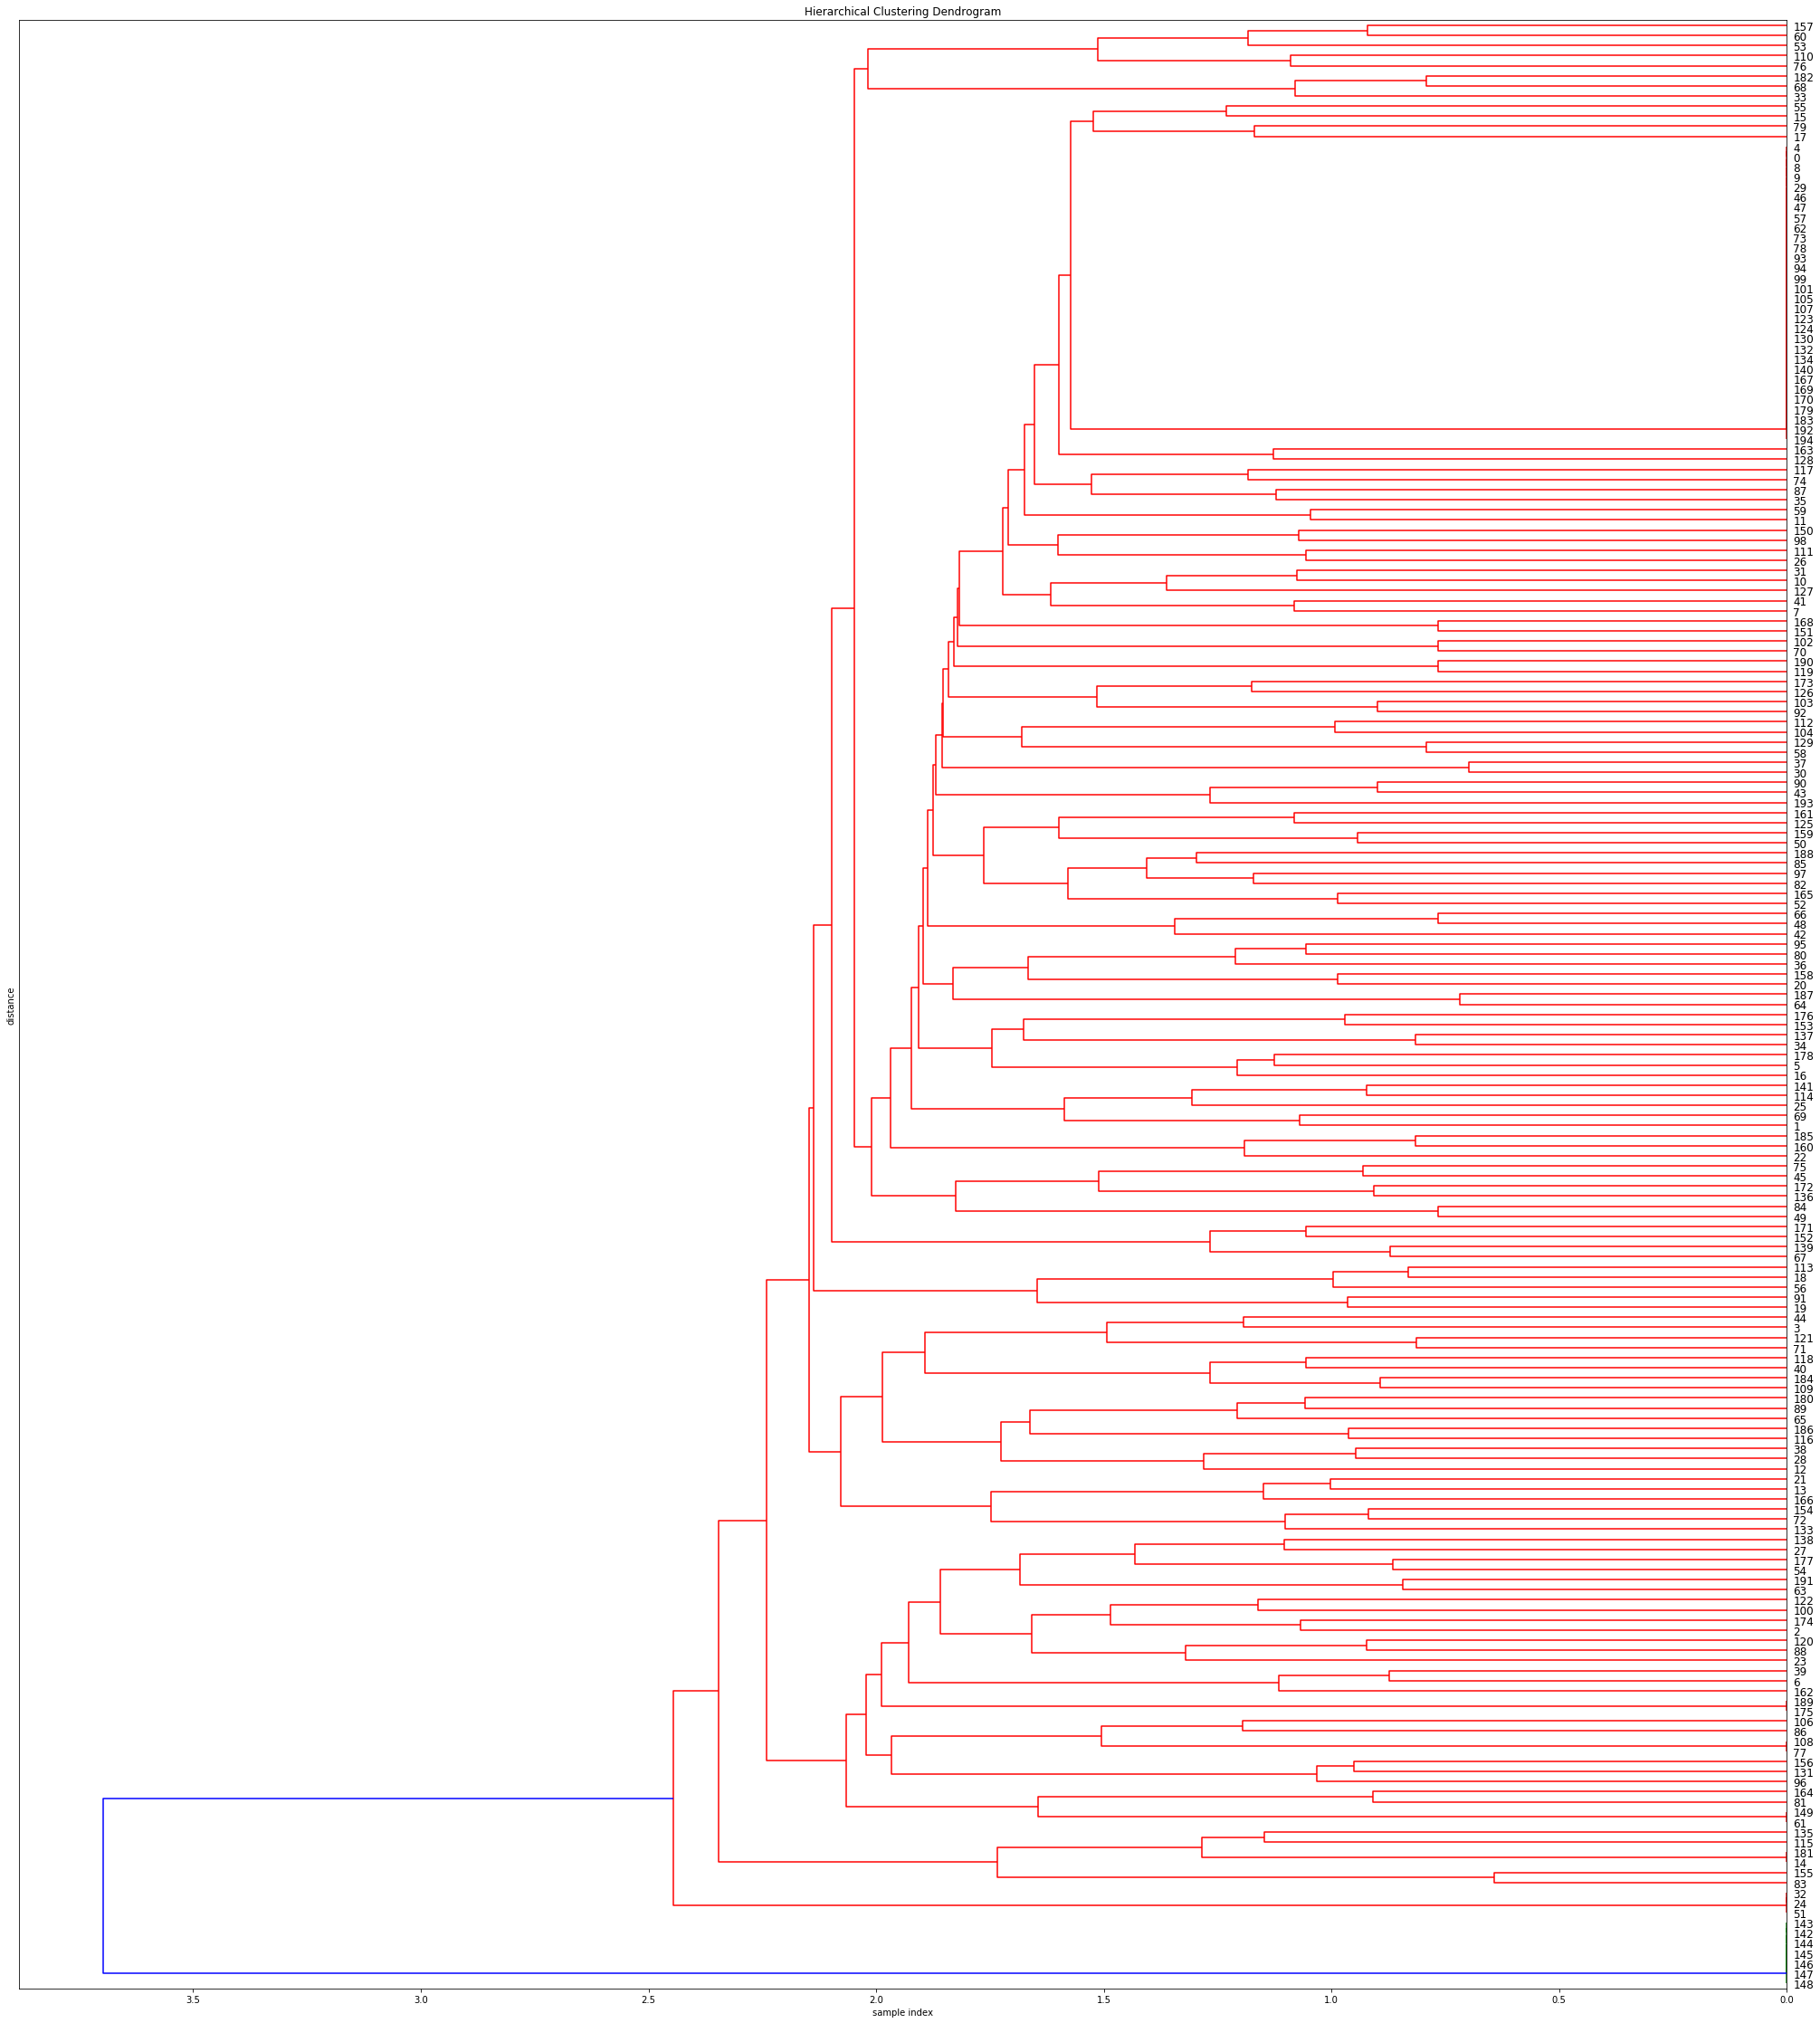

In [108]:
# calculate full dendrogram
plt.figure(figsize=(35, 40))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    orientation='left'
)
plt.show()

That's great and all, but what does it mean? Let's try a different library: **gensim**

https://radimrehurek.com/gensim/

In [110]:
from gensim.models import Word2Vec

In [200]:
corpus = text_blob.lower().split(' ')

In [201]:
corpus = [c for c in corpus if c not in stopwords] 

In [202]:
corpus[:10]

['@shortdancevids:',
 'smooth',
 'https://t.co/yeculjzejb',
 '#allsports',
 'tulsa',
 'vs',
 'oklahoma',
 'state:',
 'told',
 'tulsa']

In [203]:
c = corpus[:10]

In [208]:
c

['@shortdancevids:',
 'smooth',
 'https://t.co/yeculjzejb',
 '#allsports',
 'tulsa',
 'vs',
 'oklahoma',
 'state:',
 'told',
 'tulsa']

In [210]:
list(filter((lambda x: '@'  in x or '#'  in x or 'http'  in x), c) )

['@shortdancevids:', 'https://t.co/yeculjzejb', '#allsports']

# '@' in 'short@dance'

In [164]:
len(corpus)

1768

In [165]:
# Filter makes a generator - normally fine but hard to ad-hoc work with
corpus = list(filter((lambda x: '@' not in x and '#' not in x and 'http' not in x), corpus) )
# [c for c in corpus if ['http','@','#'] not in c]

In [199]:
myStr = 'Hello, Python'

list(filter((lambda x: 'H' in x), myStr))

['H']

In [166]:
corpus[:10]

['smooth',
 'tulsa',
 'vs',
 'oklahoma',
 'state:',
 'told',
 'tulsa',
 'fan',
 'dial',
 'liquid']

In [167]:
len(corpus)

1395

In [180]:
model = Word2Vec(corpus, min_count=4)

In [192]:
# model.wv.vectors
# l = linkage(model.wv.vectors, method='complete', metric='seuclidean')
l = linkage(model.wv.vectors, 'ward')

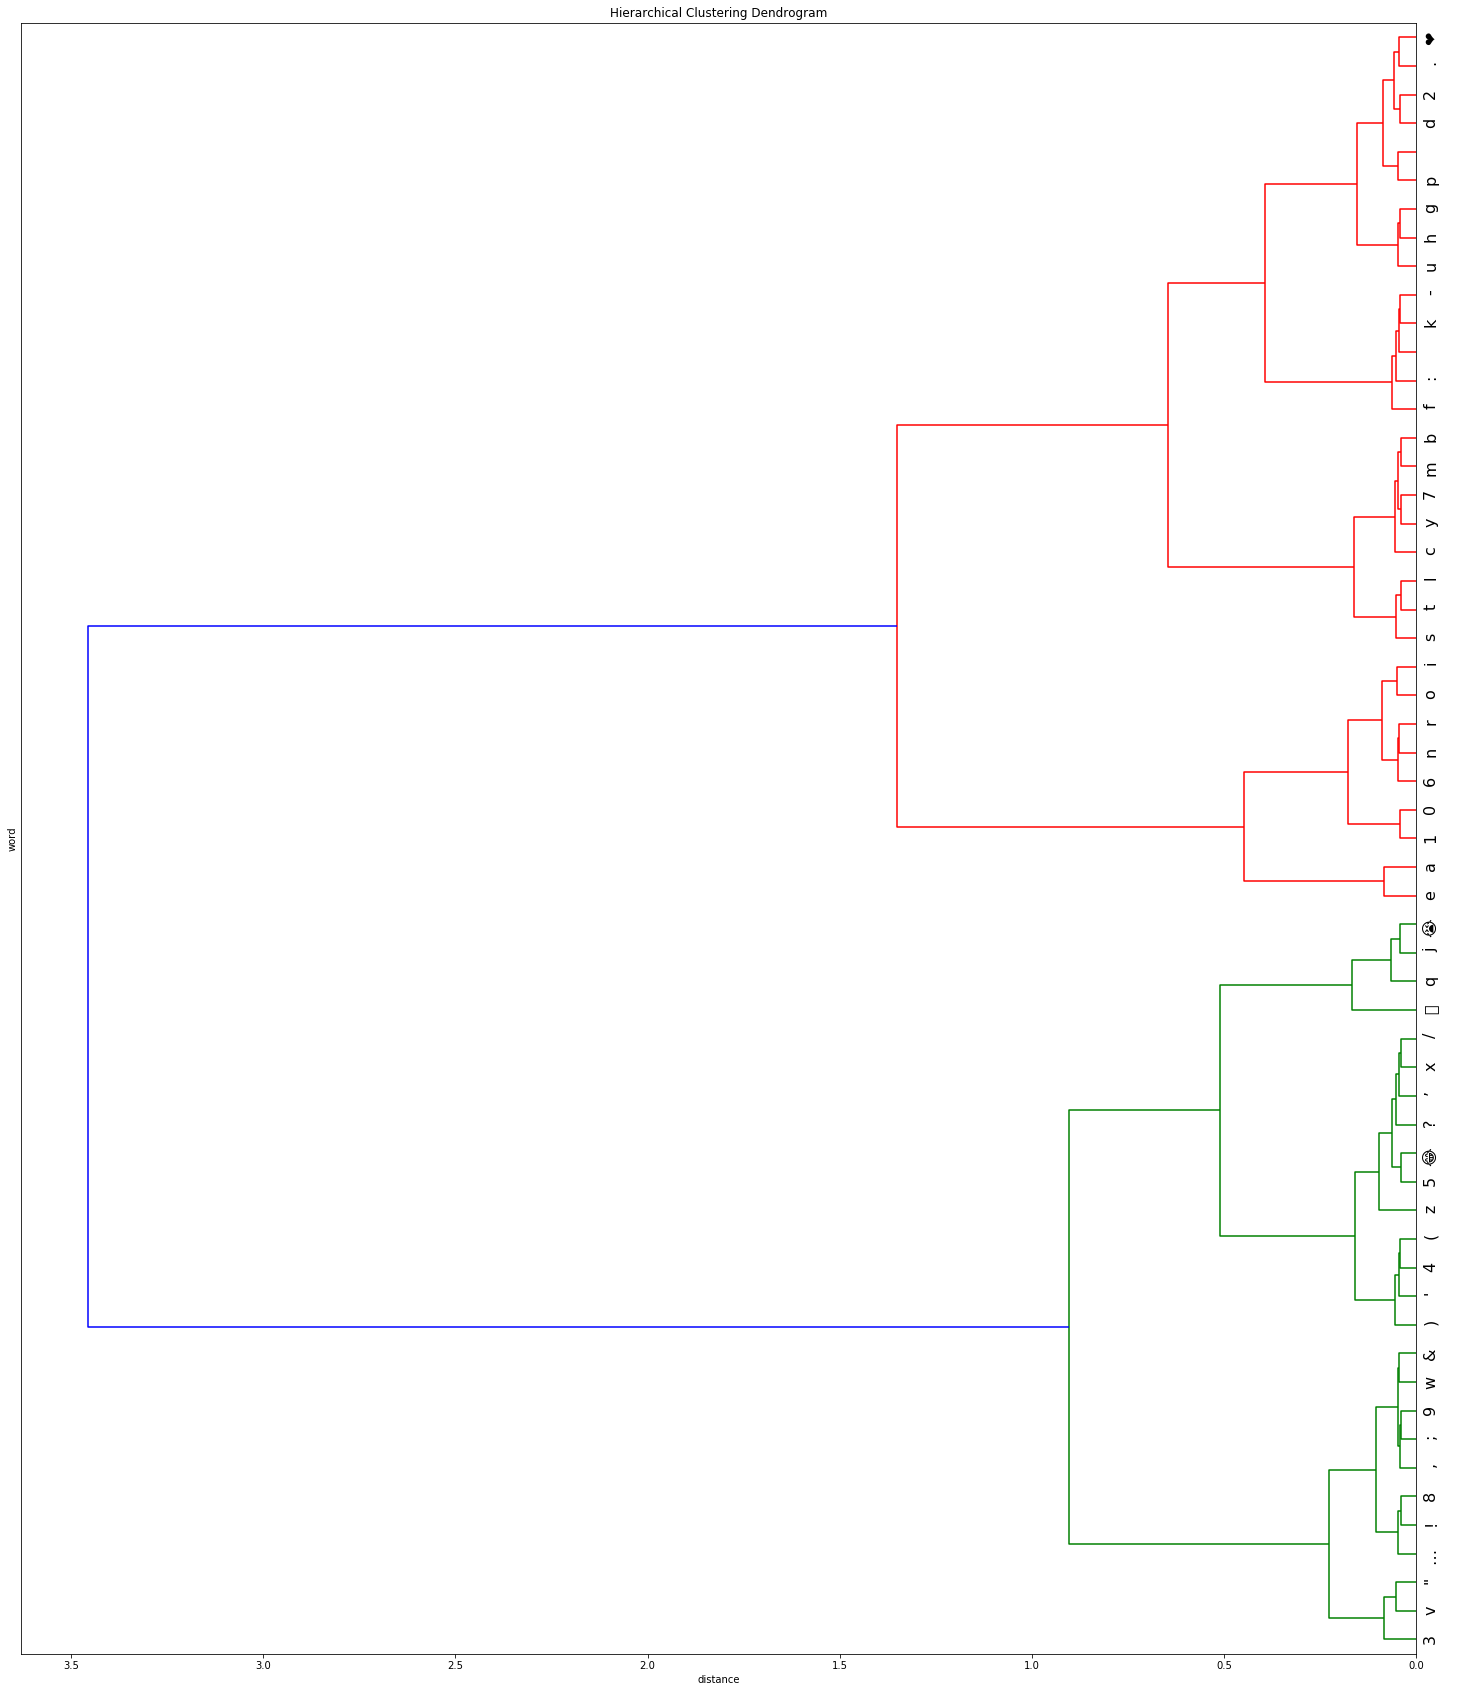

In [193]:
# calculate full dendrogram
plt.figure(figsize=(25, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

In [91]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [95]:
wordcloud = WordCloud().generate(text_blob)

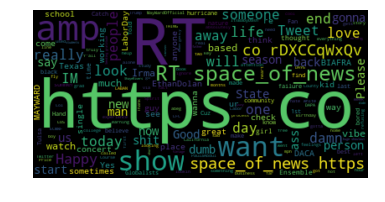

In [96]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
stop_words = set(STOPWORDS)
stop_words.update(['https','RT','amp','co'])

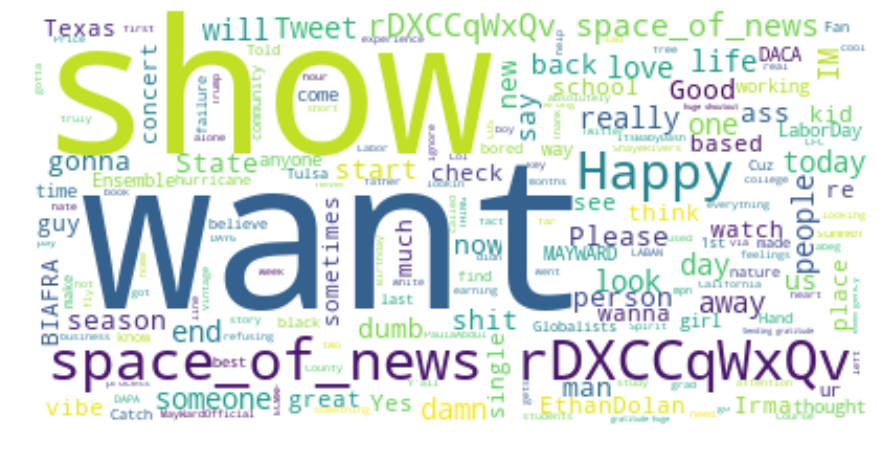

In [103]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text_blob)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()